### **REGRESSION MODELS**
by J. Daniel Velez

Here different regression models are tested

In [1]:
from f_filter_process import get_file, call_file, export_dataframe
from regression_models import*
import pandas as pd
import geopandas as gpd

In [2]:
# Function to import files
River_dict = call_file() 

2025-01-16 13:01:48.931 python[95265:5780389] +[IMKClient subclass]: chose IMKClient_Modern
2025-01-16 13:01:49.415 python[95265:5780389] The class 'NSOpenPanel' overrides the method identifier.  This method is implemented by class 'NSWindow'


##### Linear Regression
Args for the 'l_regression' function:
 * river (dict): Dictionary containing node data with 'width' and 'wse' keys.
 * min_spearman (float or None): Minimum Spearman correlation value to include a node in the plot.
                                 if None, no filtering is applied (default: None).
 * min_obs (int): Minimum number of observations required to display a scatter plot for a node (default: 10).
 * show_p_value (bool): If True, displays the p-value on each scatter plot (default: True).

In [ ]:
################## 1. Linear Regression ##################
linear_reg = l_regression(River_dict,min_spearman=0.4, min_obs=10, show_p_value=True, min_p_value=0.05)

In [ ]:
linear_reg.rename(columns={'Node': 'node_id','Spearman': 'spearman_corr'}, inplace=True)
linear_reg

In [ ]:
export_dataframe(linear_reg,is_geodataframe=False)

In [ ]:
river_gpkg = call_file()

In [6]:
## Define the common column used for merging, e.g., "id" (replace "id" with your actual column name)
common_column = "node_id"
#Merge the geodataframe with the dataframe
l_regression = river_gpkg.merge(linear_reg, on=common_column).T.drop_duplicates().T # Drop duplicate columns

In [7]:
#l_regression['geometry'] = gpd.GeoSeries.from_wkt(l_regression['geometry'])
l_regression = gpd.GeoDataFrame(l_regression, geometry='geometry', crs="EPSG:4326")
# Ensure Slope and Intercept are real numbers and round them to 3 decimals
l_regression['Slope'] = pd.to_numeric(l_regression['Slope'], errors='coerce').round(3).map(lambda x: f"{x:.3f}")
l_regression['Intercept'] = pd.to_numeric(l_regression['Intercept'], errors='coerce').round(3).map(lambda x: f"{x:.3f}")

In [ ]:
export_dataframe(l_regression,is_geodataframe=True)

In [ ]:
l_regression

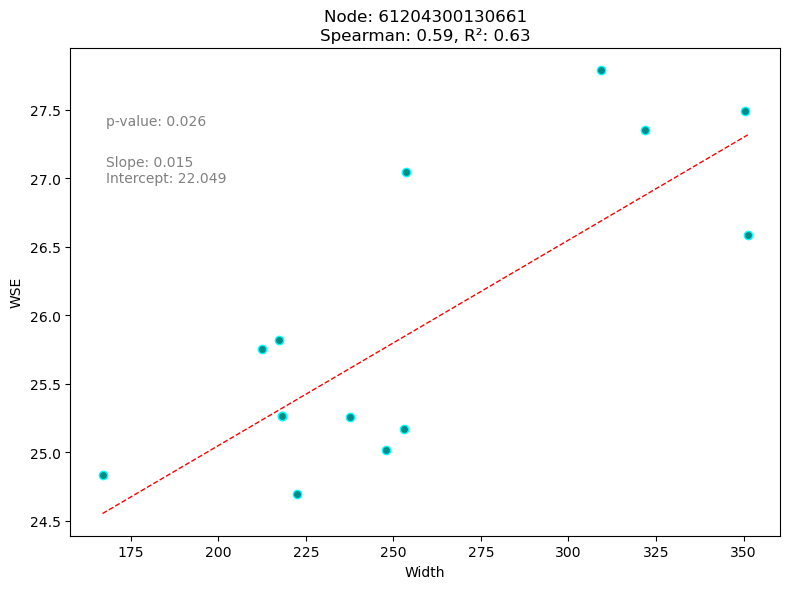

,Node,Spearman,p_value,R2,Slope,Intercept
0,61204300130661,0.591,0.026,0.63,0.015,22.049


In [39]:
l_regression_node(River_dict, node_id='61204300130661', min_spearman=None, min_obs=0, show_p_value=True, min_p_value=0.05)

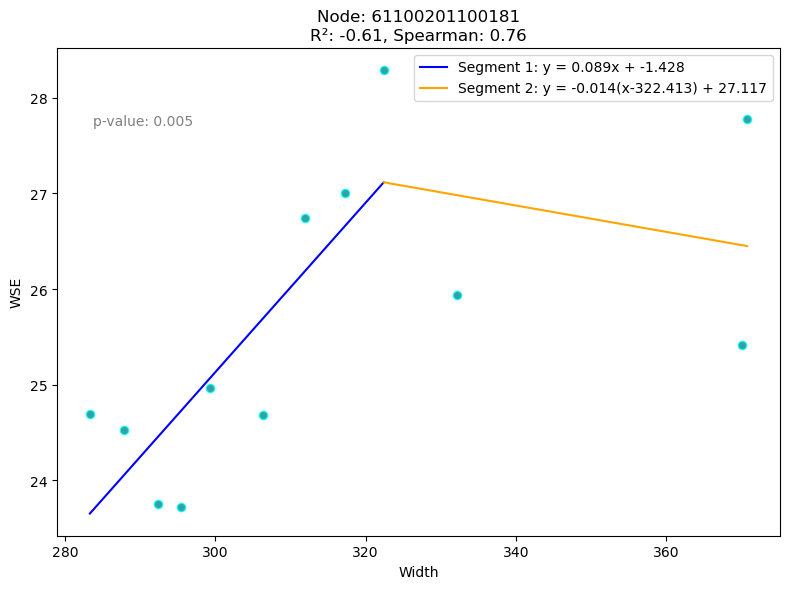

,Node,Breakpoint,Slope1,Slope2,Intercept,R2,Spearman,p_value
0,61100201100181,322.413,0.089,-0.014,-1.428,-0.612,0.755,0.005


In [4]:
pw_l_regression_node(River_dict, node_id='61100201100181')

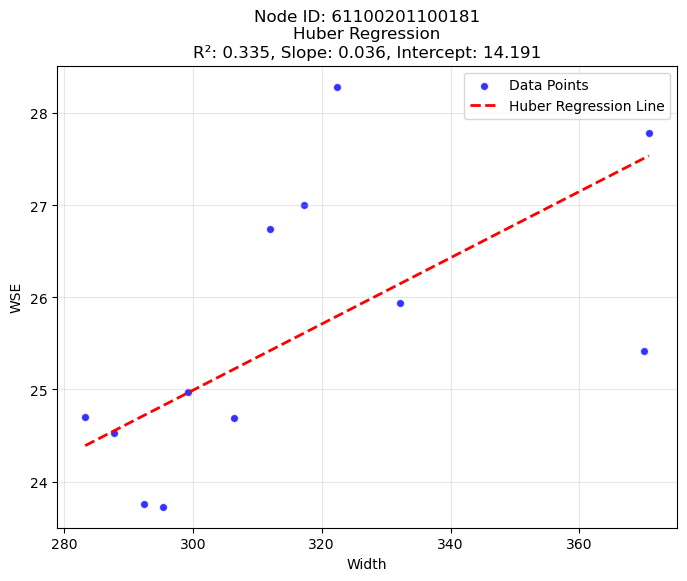

{'Node': '61100201100181',
 'Spearman_Correlation': 0.755,
 'Spearman_p_value': 0.005,
 'Pearson_Correlation': 0.591,
 'Pearson_p_value': 0.043,
 'Slope': 0.036,
 'Intercept': 14.191,
 'R_squared': 0.335}

In [5]:
huber_regression(River_dict, node_id='61100201100181', epsilon=1.35, min_obs=10)

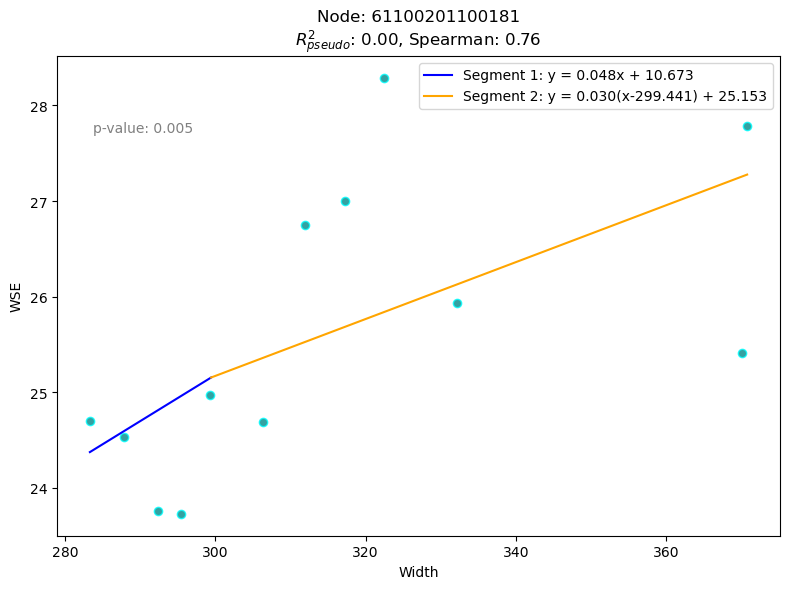

,Node,Breakpoint,Slope1,Slope2,Intercept,R2_pseudo,Spearman,p_value
0,61100201100181,299.441,0.048,0.03,10.673,0,0.755,0.005


In [6]:
pw_l_regression_huber_node(River_dict, node_id='61100201100181', show_p_value=True)